# Load libraries


In [1]:
library(data.table) ## load files into R faster
library(ggplot2) ##plotting package
library(dplyr)
library(cowplot) ##plots + arrange plots etc


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Import data

## Transcription summary

In [2]:
gene_bidir_tpm_summary_allBidirs_filteredSamples <- data.table::fread('/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/counts/normalized/gene_bidir_tpm_summary_allBidirs_filteredSamples.tsv.gz')
head(gene_bidir_tpm_summary_allBidirs_filteredSamples)

chrom,start,stop,gene_transcript,score,strand,length,stdev,variance,sum,mean,median,coefvar,max,min,num_transcribed,percent_transcribed,transcript_type
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
chr1,12623,14409,DDX11L1:NR_046018.2,.,+,1787,0.072099287,5.198307e-03,6.76054154,9.002053e-03,0.0000000,8.0092052,1.25232307,0,29,3.8615180,genes
chr1,14361,28620,WASH7P:NR_024540.1,.,-,14260,0.190457404,3.627402e-02,163.61697071,2.178655e-01,0.1674576,0.8741973,1.58704620,0,749,99.7336884,genes
chr1,17368,17436,MIR6859-1:NR_106918.1,.,-,69,0.000000000,0.000000e+00,0.00000000,0.000000e+00,0.0000000,NA,0.00000000,0,0,0.0000000,genes
chr1,30365,30503,MIR1302-2:NR_036051.1,.,+,139,0.034063044,1.160291e-03,0.93347658,1.242978e-03,0.0000000,27.4043792,0.93347658,0,1,0.1331558,genes
chr1,34610,35591,FAM138A:NR_026818.1,.,-,982,0.002709721,7.342586e-06,0.07425821,9.887911e-05,0.0000000,27.4043792,0.07425821,0,1,0.1331558,genes
chr1,66168,71585,OR4F5:NM_001005484.2,.,+,5418,0.002555593,6.531054e-06,0.18860450,2.511378e-04,0.0000000,10.1760572,0.04010044,0,11,1.4647137,genes


In [3]:
gene_bidir_tpm_summary_allBidirs_filteredSamples$gene_id <- as.character(lapply(strsplit(gene_bidir_tpm_summary_allBidirs_filteredSamples$gene_transcript, ':'),
                                                      `[`, 1))
head(gene_bidir_tpm_summary_allBidirs_filteredSamples)

chrom,start,stop,gene_transcript,score,strand,length,stdev,variance,sum,mean,median,coefvar,max,min,num_transcribed,percent_transcribed,transcript_type,gene_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
chr1,12623,14409,DDX11L1:NR_046018.2,.,+,1787,0.072099287,5.198307e-03,6.76054154,9.002053e-03,0.0000000,8.0092052,1.25232307,0,29,3.8615180,genes,DDX11L1
chr1,14361,28620,WASH7P:NR_024540.1,.,-,14260,0.190457404,3.627402e-02,163.61697071,2.178655e-01,0.1674576,0.8741973,1.58704620,0,749,99.7336884,genes,WASH7P
chr1,17368,17436,MIR6859-1:NR_106918.1,.,-,69,0.000000000,0.000000e+00,0.00000000,0.000000e+00,0.0000000,NA,0.00000000,0,0,0.0000000,genes,MIR6859-1
chr1,30365,30503,MIR1302-2:NR_036051.1,.,+,139,0.034063044,1.160291e-03,0.93347658,1.242978e-03,0.0000000,27.4043792,0.93347658,0,1,0.1331558,genes,MIR1302-2
chr1,34610,35591,FAM138A:NR_026818.1,.,-,982,0.002709721,7.342586e-06,0.07425821,9.887911e-05,0.0000000,27.4043792,0.07425821,0,1,0.1331558,genes,FAM138A
chr1,66168,71585,OR4F5:NM_001005484.2,.,+,5418,0.002555593,6.531054e-06,0.18860450,2.511378e-04,0.0000000,10.1760572,0.04010044,0,11,1.4647137,genes,OR4F5


# Summarizing transcription levels

In [20]:
#filter transcripts by TPMS
gene_bidir_tpm_summary_allBidirs_filteredSamples_tpm0.1 <- subset(gene_bidir_tpm_summary_allBidirs_filteredSamples, mean>0.1)
nrow(gene_bidir_tpm_summary_allBidirs_filteredSamples_tpm0.1)

[1] 362857

In [21]:
genes <- subset(gene_bidir_tpm_summary_allBidirs_filteredSamples_tpm0.1, 
                transcript_type == 'genes')
bidirs <- subset(gene_bidir_tpm_summary_allBidirs_filteredSamples_tpm0.1, 
                 transcript_type != 'genes')

dim(genes)
dim(bidirs)

[1] 20898    19

[1] 341959     19

In [22]:
##summary for genes
genes_per_chr <- as.data.frame(table(genes$chrom))
genes_per_chr$Percent <- (genes_per_chr$Freq/nrow(genes))*100
nrow(genes_per_chr)

##summary for bidirectionals
bidirs_per_chr <- as.data.frame(table(bidirs$chrom))
bidirs_per_chr$Percent <- (bidirs_per_chr$Freq/nrow(bidirs))*100
nrow(bidirs_per_chr)
head(bidirs_per_chr)

[1] 24

[1] 24

,Var1,Freq,Percent
,<fct>,<int>,<dbl>
1,chr1,31685,9.265731
2,chr10,14929,4.365728
3,chr11,16791,4.910238
4,chr12,17915,5.238932
5,chr13,7713,2.255534
6,chr14,11262,3.293377


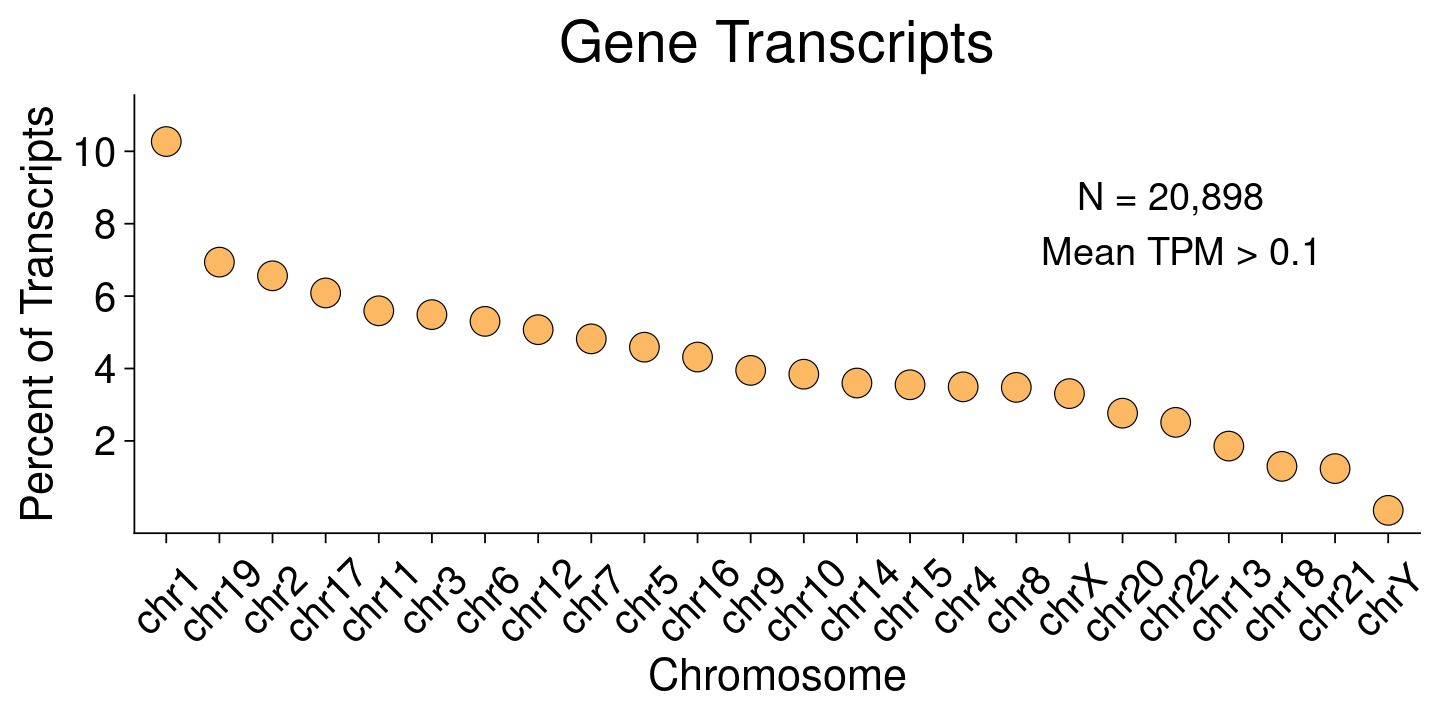

In [40]:
options(repr.plot.width=12, repr.plot.height=6)

genes_per_chr_plot <- ggplot(genes_per_chr, 
                             aes(reorder(Var1, Percent), Percent)) + 
geom_point(colour = "black", 
           fill="#fdb863",
           size = 8, 
           shape=21) +
theme_cowplot(24) +
  labs(title = "Gene Transcripts", 
       y = "Percent of Transcripts",
       x = "Chromosome") +
scale_x_discrete(limits=rev) +
scale_y_continuous(breaks=c(2,4,6,8,10),
                   limits = c(0, 11)) +
annotate('text', size = 8,  
                x = 20, y = 8,  
                label = 'N = 20,898 \n Mean TPM > 0.1', 
                color='black') +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 24, 
                                 angle=45, 
                                 hjust=0.5,
                                 vjust=0.5),
      axis.text.y = element_text(size = 24),
     legend.title = element_text(size = 24),
     legend.text = element_text(size = 20))

genes_per_chr_plot

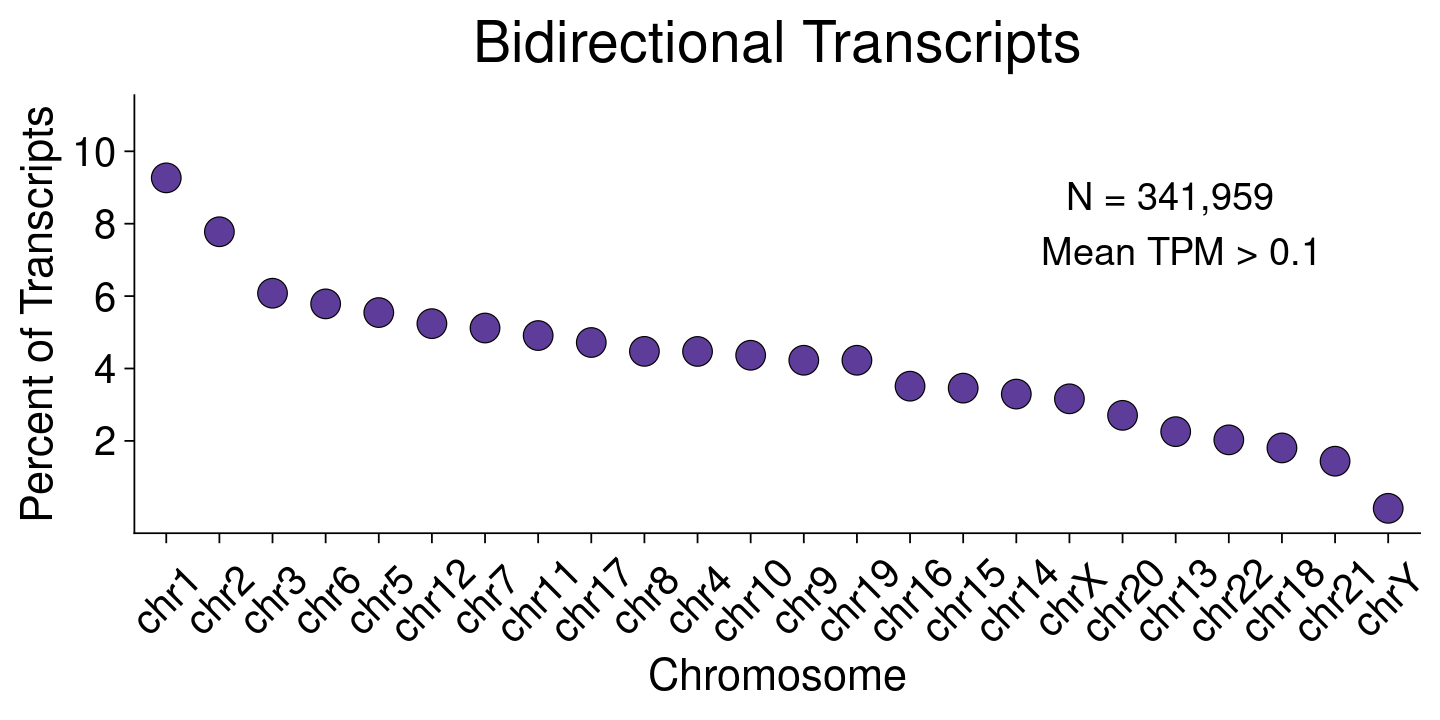

In [39]:
options(repr.plot.width=12, repr.plot.height=6)

bidirs_per_chr_plot <- ggplot(bidirs_per_chr, 
                             aes(reorder(Var1, Percent), Percent)) + 
geom_point(colour = "black", 
           fill="#5e3c99",
           size = 8, 
           shape=21) +
theme_cowplot(24) +
  labs(title = "Bidirectional Transcripts", 
       y = "Percent of Transcripts",
       x = "Chromosome") +
scale_x_discrete(limits=rev) +
scale_y_continuous(breaks=c(2,4,6,8,10),
                   limits = c(0, 11)) +
annotate('text', size = 8,  
                x = 20, y = 8,  
                label = 'N = 341,959 \n Mean TPM > 0.1', 
                color='black') +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 24, 
                                 angle=45, 
                                 hjust=0.5,
                                 vjust=0.5),
      axis.text.y = element_text(size = 24),
     legend.title = element_text(size = 24),
     legend.text = element_text(size = 20))

bidirs_per_chr_plot

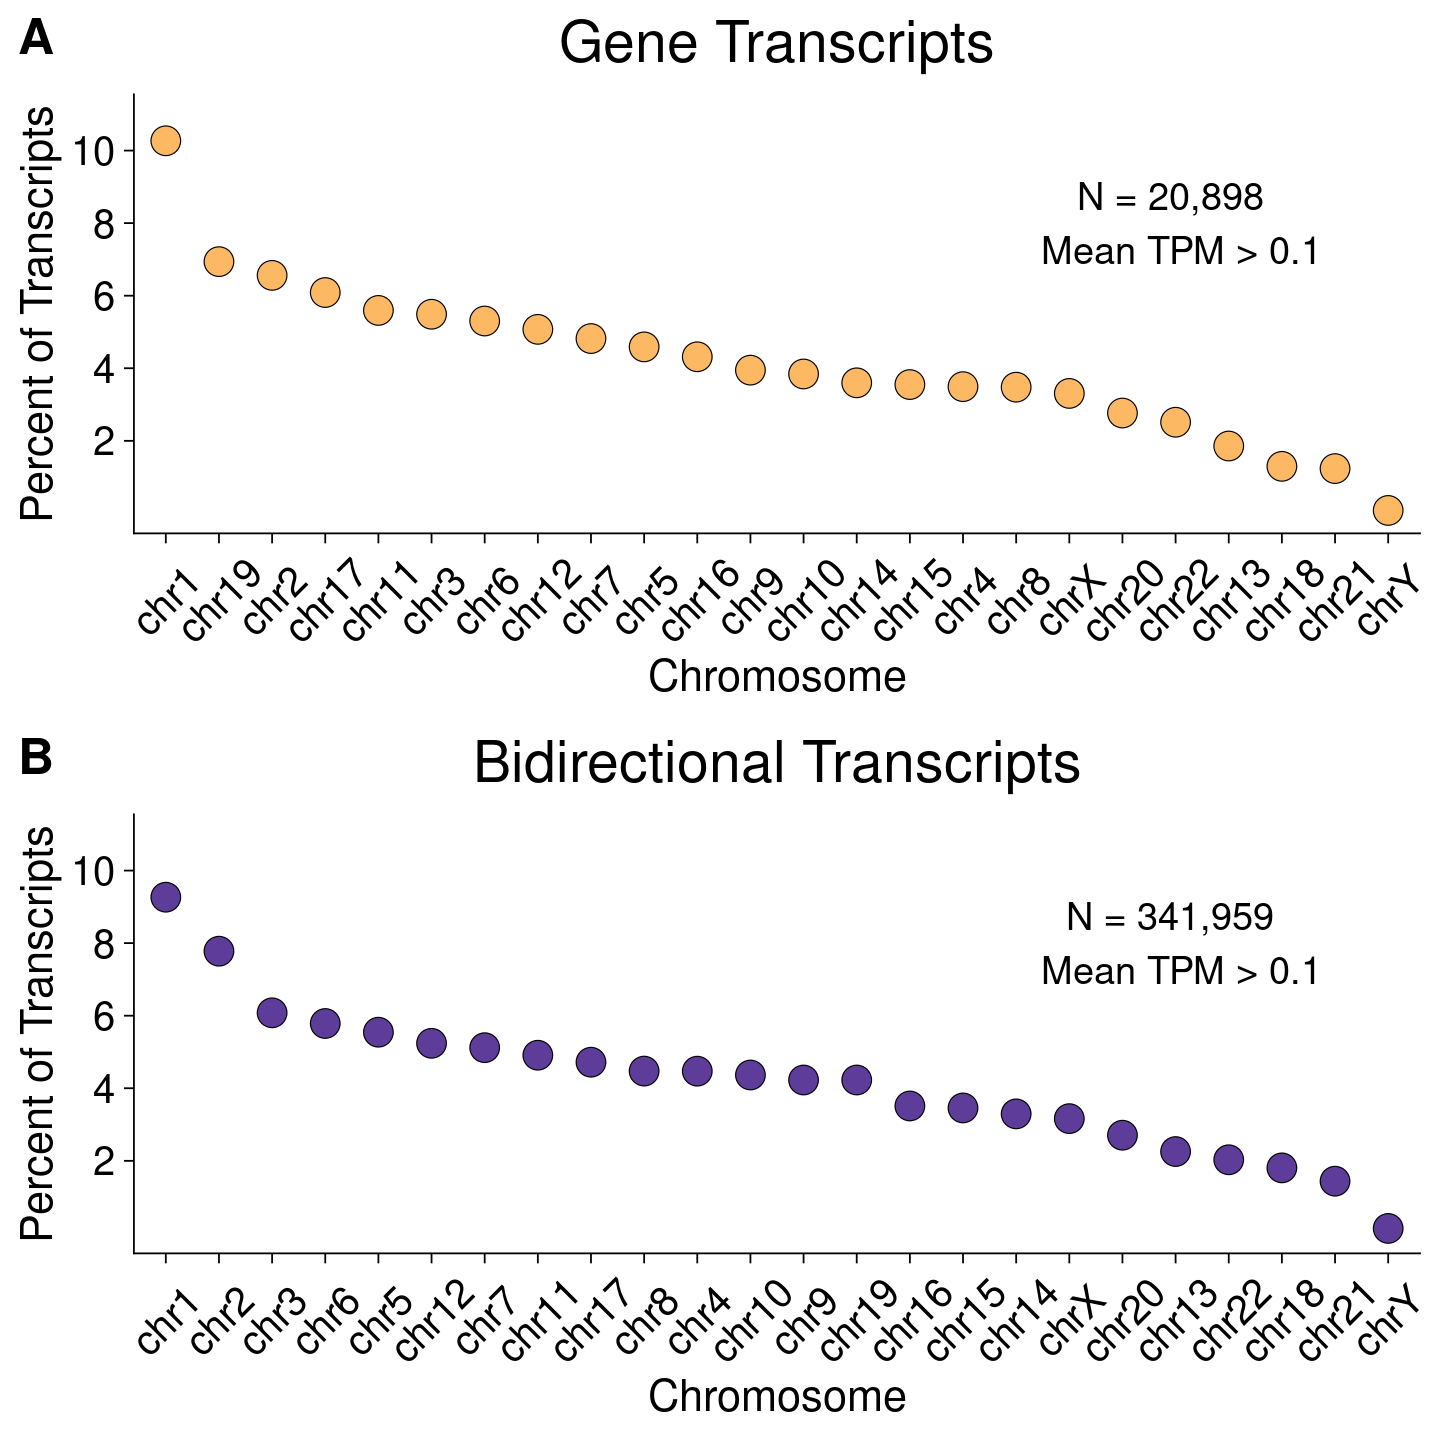

In [41]:
options(repr.plot.width=12, repr.plot.height=12)
hg38_transcript_per_chrm_plot <- cowplot::plot_grid(genes_per_chr_plot,
                                              bidirs_per_chr_plot,
                                              labels = c('A', 'B'),
                                              label_size = 30,
                                              ncol = 1)
hg38_transcript_per_chrm_plot

In [42]:
ggsave(hg38_transcript_per_chrm_plot, width = 12, height = 12,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_transcript_per_chrm_plot.pdf", 
       bg = "transparent")

ggsave(genes_per_chr_plot, width = 12, height = 6,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_genes_per_chrm_plot.pdf", 
       bg = "transparent")

ggsave(bidirs_per_chr_plot, width = 12, height = 6,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_bidirs_per_chrm_plot.pdf", 
       bg = "transparent")


# Session Information

In [43]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.1.1     dplyr_1.0.10      ggplot2_3.3.6     data.table_1.14.2

loaded via a namespace (and not attached):
 [1] pillar_1.8.1      compiler_3.6.0    R.methodsS3_1.8.2 R.utils_2.12.0   
 [5] base64enc_0.1-3   tools_3.6.0       digest_0.6.29     uuid_1.1-0       
 [9] jsonlite_1.8.0    evaluate_0.16     lifecycle_1.0.3   ti